In [1]:
%load_ext autoreload
%autoreload 2


In [21]:
from domino.evaluate import score_sdms, run_sdms, score_sdm_explanations
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
out = score_sdm_explanations.out(117237)
out.load()

,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,run_sdm_run_id,slice_name
0,0,0,0.828560,0.2,0.08,0.10,0.032609,0.108696,0.195652,0.065217,0.027907,vehicle.n.01,81082,tractor.n.01
1,1,0,0.224984,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,vehicle.n.01,81082,tractor.n.01
2,2,0,0.233245,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,vehicle.n.01,81082,tractor.n.01
3,3,0,0.204484,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,vehicle.n.01,81082,tractor.n.01
4,4,0,0.832699,0.3,0.20,0.10,0.076087,0.108696,0.206522,0.934783,0.030880,vehicle.n.01,81082,tractor.n.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11815,0,0,0.115243,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,timepiece.n.01,82221,watch.n.01
11816,1,0,0.097091,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,timepiece.n.01,82221,watch.n.01
11817,2,0,0.838045,0.0,0.04,0.06,0.029851,0.089552,0.179104,1.000000,0.035619,timepiece.n.01,82221,watch.n.01
11818,3,0,0.082260,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,timepiece.n.01,82221,watch.n.01


In [4]:
out = score_sdm_explanations(setting_dp=run_sdms.out(81039), skip_terra_cache=True)

[2021-10-03 20:30:46,044][WARNING][pip._internal.metadata.base:105] :: Ignoring invalid distribution -ay (/pd/common/envs/conda/envs/domino/lib/python3.8/site-packages)


task: score_sdm_explanations, run_id=118991


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2364/2364 [00:42<00:00, 55.70it/s]


In [7]:
from domino.plot import generate_expl_group_df
df = generate_expl_group_df(118991, metric="max_reciprocal_rank")

/home/sabri/code/domino/domino/plot.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["alpha"] = grouped_df["alpha"].round(3)


AttributeError: module 'matplotlib.pyplot' has no attribute 'xsclae'

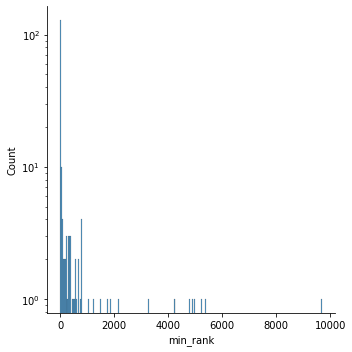

In [15]:
sns.displot(data=df[df["emb_group"] == "clip"], x="min_rank")
plt.yscale("log")
plt.xsclae("log")

In [34]:
from scipy import stats
res = stats.cumfreq(df["min_rank"], numbins=100)

In [35]:
res.cumcount

array([339., 382., 414., 431., 447., 458., 466., 470., 483., 489., 495.,
       498., 501., 502., 506., 508., 514., 516., 520., 521., 524., 525.,
       527., 528., 530., 531., 531., 534., 534., 534., 534., 534., 534.,
       535., 536., 536., 536., 537., 541., 541., 542., 543., 543., 545.,
       545., 545., 546., 546., 547., 549., 552., 553., 553., 555., 556.,
       557., 558., 559., 559., 559., 559., 559., 560., 560., 560., 560.,
       560., 560., 561., 562., 562., 563., 563., 563., 565., 565., 565.,
       565., 565., 565., 566., 566., 567., 567., 567., 567., 567., 567.,
       567., 567., 567., 567., 567., 567., 567., 567., 568., 568., 569.,
       570.])

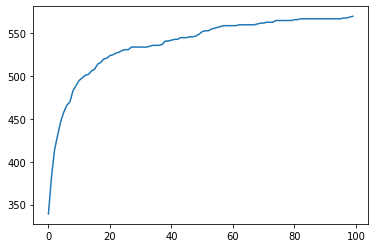

In [36]:
plt.plot(np.arange(len(res.cumcount)), res.cumcount)

In [32]:
len(df)

570

In [33]:
res

CumfreqResult(cumcount=array([458., 514., 534., 541., 549., 559., 563., 567., 567., 570.]), lowerlimit=-543.0, binsize=1088.0, extrapoints=0)

In [75]:
hist = np.histogram(df["min_rank"], bins=[1, 2,3,4,5,6,7,8,9,10,11, df["min_rank"].max()])

Text(0.5, 0, 'Minimum Rank of Slice Synonym')

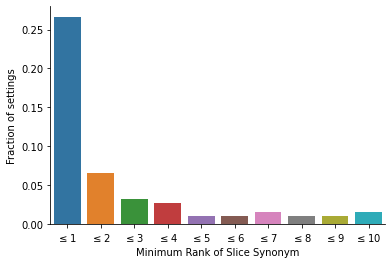

In [79]:

sns.barplot(x=[fr"$\leq{x}$" for x in hist[1][:-2]], y=hist[0][:-1] /len(df))
sns.despine()
plt.ylabel("Fraction of settings")
plt.xlabel("Minimum Rank of Slice Synonym")

In [73]:
hist

(array([152,  37,  18,  15,   6,   6,   9,   6,   6,  51, 264]),
 array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   25,
        9793]))